In [1]:
import numpy as np
import mglearn
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron

In [7]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [8]:
# Training Data
train_X = numpy.asarray([[-0.4, 0.3], [-0.3, -0.1], [-0.2, 0.4], [-0.1, 0.1], [0.1, -0.5], [0.2, -0.9], [0.3, 0.2], [0.4, -0.6]])
train_Y = numpy.asarray([[1], [1], [1], [1], [0], [0], [0], [0]])
n_samples = train_X.shape[0]

In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2]) # input data
y = tf.placeholder(tf.float32, [None, 1]) # lables

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Construct model
pred = tf.sigmoid(tf.matmul(x, W) + b) # Sigmoid activation

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        # Training loop
        _, c = sess.run([optimizer, cost], feed_dict={x: train_X, y: train_Y})
        
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                   "W=", numpy.array_str(sess.run(W)).replace('\n', ',')
                   , "b=", sess.run(b))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy on training data
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: train_X, y: train_Y}))

Epoch: 0001 cost= 0.346573591 W= [[-0.000625 ], [ 0.0004375]] b= [ 0.0025]
Epoch: 0002 cost= 0.345890850 W= [[-0.00124914], [ 0.00087438]] b= [ 0.00499658]
Epoch: 0003 cost= 0.345209986 W= [[-0.00187241], [ 0.00131064]] b= [ 0.00748976]
Epoch: 0004 cost= 0.344530940 W= [[-0.00249482], [ 0.00174629]] b= [ 0.00997952]
Epoch: 0005 cost= 0.343853801 W= [[-0.00311637], [ 0.00218132]] b= [ 0.01246589]
Epoch: 0006 cost= 0.343178540 W= [[-0.00373706], [ 0.00261573]] b= [ 0.01494885]
Epoch: 0007 cost= 0.342505097 W= [[-0.00435689], [ 0.00304953]] b= [ 0.01742843]
Epoch: 0008 cost= 0.341833472 W= [[-0.00497586], [ 0.00348272]] b= [ 0.01990461]
Epoch: 0009 cost= 0.341163725 W= [[-0.00559398], [ 0.00391529]] b= [ 0.02237742]
Epoch: 0010 cost= 0.340495765 W= [[-0.00621124], [ 0.00434725]] b= [ 0.02484684]
Epoch: 0011 cost= 0.339829654 W= [[-0.00682765], [ 0.0047786 ]] b= [ 0.02731289]
Epoch: 0012 cost= 0.339165390 W= [[-0.00744321], [ 0.00520934]] b= [ 0.02977557]
Epoch: 0013 cost= 0.338502884 W= [

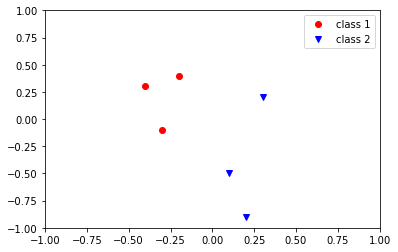

In [11]:
#Graphic display

plt.plot(train_X[0:3, 0], train_X[0:3, 1],  'ro', label='class 1')
plt.plot(train_X[4:7, 0], train_X[4:7, 1],  'bv', label='class 2')
#plt.plot(train_X, [-0.01536841,  0.01075379],  b= [ 0.06148605], label='Classifier boundary')

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.legend()
plt.show()#Graphic display
